# Testing various model variations with data

## Imports

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.signal import argrelextrema

## Data fetching and preprocessing

### Fetching

In [ ]:
# Get data from yahoo
nvda = yf.Ticker("NVDA")

# Get historical market data
hist = nvda.history(period="max")

hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040125,0.044783,0.035587,0.037618,2714688000,0.0,0.0
1999-01-25 00:00:00-05:00,0.040603,0.042036,0.037618,0.041559,510480000,0.0,0.0
1999-01-26 00:00:00-05:00,0.042036,0.042872,0.037737,0.038334,343200000,0.0,0.0
1999-01-27 00:00:00-05:00,0.038453,0.039409,0.036303,0.038215,244368000,0.0,0.0
1999-01-28 00:00:00-05:00,0.038215,0.038453,0.037856,0.038095,227520000,0.0,0.0


### Feature engineering & preprocessing

Create algorithm to search for local mins and max points

In [ ]:
def linear_regression(x, y):
    """
    performs linear regression given x and y. outputs regression coefficient
    """
    #fit linear regression
    lr = LinearRegression()
    lr.fit(x, y)

    return lr.coef_[0][0]

In [ ]:
def n_day_regression(n, df, idxs):
    """
    n day regression.
    """
    #variable
    _varname_ = f'{n}_reg'
    df[_varname_] = np.nan

    for idx in idxs:
        if idx > n:
            
            y = df['Close'][idx - n: idx].to_numpy()
            x = np.arange(0, n)
            #reshape
            y = y.reshape(y.shape[0], 1)
            x = x.reshape(x.shape[0], 1)
            #calculate regression coefficient 
            coef = linear_regression(x, y)
            df.loc[idx, _varname_] = coef #add the new value
            
    return df

In [ ]:
def normalized_values(high, low, close):
    """
    normalize the price between 0 and 1.
    """
    #epsilon to avoid deletion by 0
    epsilon = 10e-10
    
    #subtract the lows
    high = high - low
    close = close - low
    return close/(high + epsilon)

In [ ]:
data=pd.DataFrame(hist)

# First, reset the index to make the date an explicit column
data.reset_index(inplace=True)

# Rename the index column to 'Date' for clarity
data.rename(columns={'index': 'Date'}, inplace=True)

data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22 00:00:00-05:00,0.040125,0.044783,0.035587,0.037618,2714688000,0.0,0.0
1,1999-01-25 00:00:00-05:00,0.040603,0.042036,0.037618,0.041559,510480000,0.0,0.0
2,1999-01-26 00:00:00-05:00,0.042036,0.042872,0.037737,0.038334,343200000,0.0,0.0
3,1999-01-27 00:00:00-05:00,0.038453,0.039409,0.036303,0.038215,244368000,0.0,0.0
4,1999-01-28 00:00:00-05:00,0.038215,0.038453,0.037856,0.038095,227520000,0.0,0.0
...,...,...,...,...,...,...,...,...
6466,2024-10-03 00:00:00-04:00,120.919998,124.360001,120.339996,122.849998,277118000,0.0,0.0
6467,2024-10-04 00:00:00-04:00,124.940002,125.040001,121.830002,124.919998,243678100,0.0,0.0
6468,2024-10-07 00:00:00-04:00,124.989998,130.639999,124.949997,127.720001,346250200,0.0,0.0
6469,2024-10-08 00:00:00-04:00,130.259995,133.479996,129.419998,132.889999,284485800,0.0,0.0


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], unit = 'ms')
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22 00:00:00-05:00,0.040125,0.044783,0.035587,0.037618,2714688000,0.0,0.0
1,1999-01-25 00:00:00-05:00,0.040603,0.042036,0.037618,0.041559,510480000,0.0,0.0
2,1999-01-26 00:00:00-05:00,0.042036,0.042872,0.037737,0.038334,343200000,0.0,0.0
3,1999-01-27 00:00:00-05:00,0.038453,0.039409,0.036303,0.038215,244368000,0.0,0.0
4,1999-01-28 00:00:00-05:00,0.038215,0.038453,0.037856,0.038095,227520000,0.0,0.0
...,...,...,...,...,...,...,...,...
6466,2024-10-03 00:00:00-04:00,120.919998,124.360001,120.339996,122.849998,277118000,0.0,0.0
6467,2024-10-04 00:00:00-04:00,124.940002,125.040001,121.830002,124.919998,243678100,0.0,0.0
6468,2024-10-07 00:00:00-04:00,124.989998,130.639999,124.949997,127.720001,346250200,0.0,0.0
6469,2024-10-08 00:00:00-04:00,130.259995,133.479996,129.419998,132.889999,284485800,0.0,0.0


![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
#add the noramlzied value function and create a new column
data['normalized_value'] = data.apply(lambda x: normalized_values(x.High, x.Low, x.Close), axis = 1)
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,normalized_value
0,1999-01-22 00:00:00-05:00,0.040125,0.044783,0.035587,0.037618,2714688000,0.0,0.0,0.220826
1,1999-01-25 00:00:00-05:00,0.040603,0.042036,0.037618,0.041559,510480000,0.0,0.0,0.892049
2,1999-01-26 00:00:00-05:00,0.042036,0.042872,0.037737,0.038334,343200000,0.0,0.0,0.116271
3,1999-01-27 00:00:00-05:00,0.038453,0.039409,0.036303,0.038215,244368000,0.0,0.0,0.615475
4,1999-01-28 00:00:00-05:00,0.038215,0.038453,0.037856,0.038095,227520000,0.0,0.0,0.399385
...,...,...,...,...,...,...,...,...,...
6466,2024-10-03 00:00:00-04:00,120.919998,124.360001,120.339996,122.849998,277118000,0.0,0.0,0.624378
6467,2024-10-04 00:00:00-04:00,124.940002,125.040001,121.830002,124.919998,243678100,0.0,0.0,0.962616
6468,2024-10-07 00:00:00-04:00,124.989998,130.639999,124.949997,127.720001,346250200,0.0,0.0,0.486820
6469,2024-10-08 00:00:00-04:00,130.259995,133.479996,129.419998,132.889999,284485800,0.0,0.0,0.854681


In [ ]:
#column with local minima and maxima
# set n to 10 as a test
n = 10

data['loc_min'] = data.iloc[argrelextrema(data.Close.values, np.less_equal, order = n)[0]]['Close']
data['loc_max'] = data.iloc[argrelextrema(data.Close.values, np.greater_equal, order = n)[0]]['Close']
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,normalized_value,loc_min,loc_max
0,1999-01-22 00:00:00-05:00,0.040125,0.044783,0.035587,0.037618,2714688000,0.0,0.0,0.220826,NaN,NaN
1,1999-01-25 00:00:00-05:00,0.040603,0.042036,0.037618,0.041559,510480000,0.0,0.0,0.892049,NaN,0.041559
2,1999-01-26 00:00:00-05:00,0.042036,0.042872,0.037737,0.038334,343200000,0.0,0.0,0.116271,NaN,NaN
3,1999-01-27 00:00:00-05:00,0.038453,0.039409,0.036303,0.038215,244368000,0.0,0.0,0.615475,NaN,NaN
4,1999-01-28 00:00:00-05:00,0.038215,0.038453,0.037856,0.038095,227520000,0.0,0.0,0.399385,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6466,2024-10-03 00:00:00-04:00,120.919998,124.360001,120.339996,122.849998,277118000,0.0,0.0,0.624378,NaN,NaN
6467,2024-10-04 00:00:00-04:00,124.940002,125.040001,121.830002,124.919998,243678100,0.0,0.0,0.962616,NaN,NaN
6468,2024-10-07 00:00:00-04:00,124.989998,130.639999,124.949997,127.720001,346250200,0.0,0.0,0.486820,NaN,NaN
6469,2024-10-08 00:00:00-04:00,130.259995,133.479996,129.419998,132.889999,284485800,0.0,0.0,0.854681,NaN,NaN


In [ ]:
# Get the idxs of the local minima and maxima
idxs_with_mins = np.where(data['loc_min'] > 0)[0]
idxs_with_maxs = np.where(data['loc_max'] > 0)[0]

In [ ]:
#create regressions for 3, 5 and 10 days
data = n_day_regression(3, data, list(idxs_with_mins) + list(idxs_with_maxs))
data = n_day_regression(5, data, list(idxs_with_mins) + list(idxs_with_maxs))
data = n_day_regression(10, data, list(idxs_with_mins) + list(idxs_with_maxs))
data = n_day_regression(20, data, list(idxs_with_mins) + list(idxs_with_maxs))


# Save the indices in a list for later plot
original_idxs = data[(data['loc_min'] > 0) | (data['loc_max'] > 0)].index.tolist()

_data_ = data[(data['loc_min'] > 0) | (data['loc_max'] > 0)]

#create a dummy variable for local_min (0) and max (1)
_data_['target'] = [1 if x > 0 else 0 for x in _data_.loc_max]

#columns of interest
cols_of_interest = ['Volume', 'normalized_value', '3_reg', '5_reg', '10_reg', '20_reg', 'target']
_data_ = _data_[cols_of_interest]

train_data = _data_.dropna(axis = 0, inplace=False)
train_idxs = train_data.index.tolist()

/tmp/ipykernel_3759/2697487542.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _data_['target'] = [1 if x > 0 else 0 for x in _data_.loc_max]


## Testing @kaneelgit 's model approach

(simplyfing it by only using nvda stock)

link: https://github.com/kaneelgit/Trading-strategy-/blob/main/models/lr_run_training.py

### Train the Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


class LR_training:

    def __init__(self, model_version, threshold = 0.98, start_date = None, end_date = None):

        self.model_version = model_version
        self.threshold = threshold
        
        # if start_date:
        #     self.start_date = start_date
        # if end_date:
        #     self.end_date = end_date

        # #get stock ticker symbols
        # dow = ['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC',\
        # 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH',\
        # 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS']
        # sp500 = #use pandas to open the companies csv
        # sp = list(sp500['Ticker'])
        # stocks = dow + sp[:20]
        # self.stocks = list(np.unique(stocks))

        #main dataframe
        self.main_df = pd.DataFrame(columns = ['Volume', 'normalized_value', '3_reg', '5_reg', '10_reg', '20_reg', 'target'])

        #init models
        self.scaler = MinMaxScaler()
        self.lr = LogisticRegression()

        #run logistic regresion
        self.fetch_data()
        self.create_train_test()
        self.fit_model()
        self.confusion_matrix()
        self.save_model()

    def fetch_data(self):
        """
        get train and test data
        """ 
        # for stock in self.stocks:
        #     try: 
        #         df = stock_utils.create_train_data(stock, n = 10)
        #         self.main_df = self.main_df.append(df)
        #     except:
        #         pass
        self.main_df = train_data
        print(f'{len(self.main_df)} samples were fetched from the above..')

    def create_train_test(self):
        """
        create train and test data
        """
        self.main_df = self.main_df.sample(frac = 1, random_state = 3). reset_index(drop = True)
        self.main_df['target'] = self.main_df['target'].astype('category')
        
        y = self.main_df.pop('target').to_numpy()
        y = y.reshape(y.shape[0], 1)
        x = self.scaler.fit_transform(self.main_df)

        #test train split
        self.train_x, self.test_x, self.train_y, self.test_y = train_test_split(x, y, \
            test_size = 0.05, random_state = 50, shuffle = True)

        print('Created test and train data...')

    def fit_model(self):

        print('Training model...')
        self.lr.fit(self.train_x, self.train_y)
        
        #predict the test data
        self.predictions = self.lr.predict(self.test_x)
        self.score = self.lr.score(self.test_x, self.test_y)
        print(f'Logistic regression model score: {self.score}')

        #preds with threshold
        self.predictions_proba = self.lr._predict_proba_lr(self.test_x)
        self.predictions_proba_thresholded = self._threshold(self.predictions_proba, self.threshold)
      
    def confusion_matrix(self):
        cm = confusion_matrix(self.test_y, self.predictions)
        self.cmd = ConfusionMatrixDisplay(cm)
        # plot confusion matrix
        self.cmd.plot()
        
        cm_thresholded = confusion_matrix(self.test_y, self.predictions_proba_thresholded)
        self.cmd_thresholded = ConfusionMatrixDisplay(cm_thresholded)

        
    def _threshold(self, predictions, threshold):

        prob_thresholded = [0 if x > threshold else 1 for x in predictions[:, 0]]

        return np.array(prob_thresholded)

    def save_model(self):

        # #save models
        # saved_models_dir = os.path.join(os.getcwd(), 'saved_models')
        # model_file = f'lr_{self.model_version}.sav'
        # model_dir = os.path.join(saved_models_dir, model_file)
        # pickle.dump(self.lr, open(model_dir, 'wb'))

        # scaler_file = f'scaler_{self.model_version}.sav'
        # scaler_dir = os.path.join(saved_models_dir, scaler_file)
        # pickle.dump(self.scaler, open(scaler_dir, 'wb'))

        # print(f'Saved the model and scaler in {saved_models_dir}')
        # cm_path = os.path.join(os.getcwd(), 'results\Confusion Matrices')
        
        # #save cms
        # plt.figure()
        # self.cmd.plot()
        # plt.savefig(f'{cm_path}\\cm_{self.model_version}.jpg')

        # plt.figure()
        # self.cmd_thresholded.plot()
        # plt.savefig(f'{cm_path}\\cm_thresholded_{self.model_version}.jpg')
        # print(f'Figures saved in {cm_path}')
        print('Model saved... (supposely)')

397 samples were fetched from the above..
Created test and train data...
Training model...
Logistic regression model score: 0.85
Model saved... (supposely)


/home/aitha/miniconda3/envs/stock_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


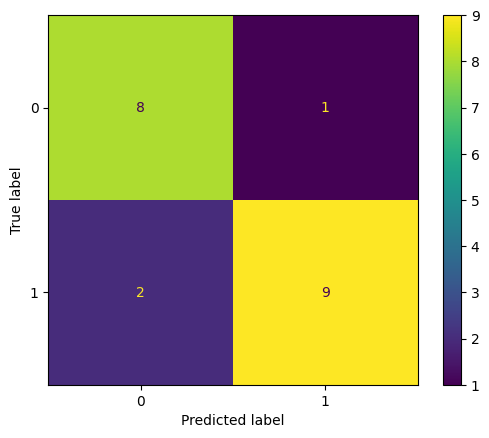

In [ ]:
run_lr = LR_training('demo')

### Inference

We will inference the model with the NVDA stock as well just to display results (Not evaluating the model)

In [ ]:
train_data

,Volume,normalized_value,3_reg,5_reg,10_reg,20_reg,target
22,612768000,0.183670,0.001074,0.000967,0.000634,0.000190,1
28,57360000,0.106967,-0.001612,-0.001015,0.000151,0.000392,0
42,60864000,0.856830,-0.001791,-0.000705,-0.000271,-0.000243,0
45,65952000,0.428416,0.001851,0.000239,-0.000307,-0.000173,1
64,123504000,0.250240,-0.001612,-0.000764,-0.000417,-0.000300,0
...,...,...,...,...,...,...,...
6406,248978600,0.929104,2.774769,1.733853,0.496928,0.019773,1
6426,411440400,0.021761,-1.509869,-3.429707,-1.185414,-1.491813,0
6434,318333600,1.000000,3.249722,3.783677,2.915327,-0.058333,1
6447,413638100,0.261112,-0.394966,-3.391711,-2.654319,0.092751,0


In [ ]:
train_idxs

[22,
 28,
 42,
 45,
 64,
 80,
 90,
 96,
 102,
 118,
 125,
 126,
 153,
 170,
 178,
 187,
 210,
 228,
 238,
 258,
 272,
 280,
 287,
 300,
 306,
 311,
 328,
 357,
 366,
 372,
 382,
 409,
 420,
 426,
 448,
 453,
 470,
 485,
 505,
 519,
 523,
 532,
 548,
 555,
 577,
 581,
 599,
 607,
 630,
 640,
 676,
 705,
 712,
 740,
 747,
 756,
 774,
 780,
 818,
 834,
 864,
 872,
 887,
 899,
 909,
 913,
 933,
 953,
 956,
 969,
 990,
 993,
 1018,
 1026,
 1036,
 1048,
 1051,
 1079,
 1097,
 1113,
 1120,
 1142,
 1163,
 1177,
 1206,
 1221,
 1227,
 1249,
 1261,
 1270,
 1292,
 1307,
 1326,
 1341,
 1345,
 1365,
 1392,
 1432,
 1446,
 1484,
 1495,
 1509,
 1533,
 1567,
 1606,
 1619,
 1625,
 1634,
 1650,
 1659,
 1684,
 1702,
 1706,
 1722,
 1764,
 1768,
 1812,
 1822,
 1832,
 1872,
 1880,
 1913,
 1936,
 1977,
 1990,
 2015,
 2022,
 2048,
 2050,
 2061,
 2086,
 2131,
 2145,
 2166,
 2175,
 2185,
 2197,
 2224,
 2245,
 2260,
 2278,
 2302,
 2310,
 2319,
 2356,
 2397,
 2409,
 2426,
 2435,
 2454,
 2462,
 2474,
 2492,
 2498,
 2

In [ ]:
def _threshold(predictions, threshold):

        prob_thresholded = [0 if x > threshold else 1 for x in predictions[:, 0]]

        return np.array(prob_thresholded)

In [ ]:
model = run_lr.lr
scaler = run_lr.scaler

# Preprocess Data
pred_df = train_data.copy()
print(f'{len(pred_df)} samples were fetched from the above..')


pred_df['target'] = pred_df['target'].astype('category')

y = pred_df.pop('target').to_numpy()
y = y.reshape(y.shape[0], 1)
x = scaler.fit_transform(pred_df)
print('Created inference data...')

# Predict
predictions = model.predict(x)
score = model.score(x, y)
print(f'Logistic regression model score: {score}')

#preds with threshold
predictions_proba = model._predict_proba_lr(x)
predictions_proba_thresholded = _threshold(predictions_proba, threshold=0.94)


397 samples were fetched from the above..
Created inference data...
Logistic regression model score: 0.8740554156171285


In [ ]:
# Create a dataframe with the predictions and their original indexes
df_preds = pd.DataFrame({
    'og_idx': train_idxs,
    'preds': predictions_proba_thresholded
})

# Display the DataFrame
df_preds

,og_idx,preds
0,22,1
1,28,1
2,42,1
3,45,1
4,64,1
...,...,...
392,6406,1
393,6426,0
394,6434,1
395,6447,1


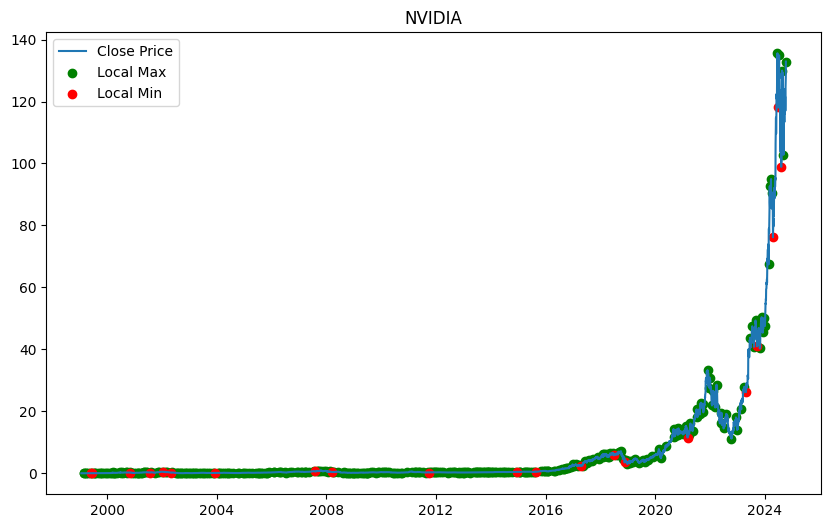

In [ ]:
import matplotlib.pyplot as plt

# Reset the index of the original data to get the 'Date' column
data_reset = data.reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(data_reset['Date'], data_reset['Close'], label='Close Price')

# Highlight the indices with predictions of 1 in green
plt.scatter(data_reset.loc[df_preds[df_preds['preds'] == 1]['og_idx'], 'Date'],
            data_reset.loc[df_preds[df_preds['preds'] == 1]['og_idx'], 'Close'],
            color='green', label='Local Max')

# Highlight the indices with predictions of 0 in red
plt.scatter(data_reset.loc[df_preds[df_preds['preds'] == 0]['og_idx'], 'Date'],
            data_reset.loc[df_preds[df_preds['preds'] == 0]['og_idx'], 'Close'],
            color='red', label='Local Min')

# Add title and legend
plt.title("NVIDIA")
plt.legend()
plt.show()

## Train the model using more Data

Use the first 50 Companies from S&P

In [ ]:
def fetch_data(stocks: list, start_date: str|None=None, end_date: str|None=None, verbose: bool=False) -> dict:
    """
    fetch data for all the stocks
    """
    df_dict = {} #store the dataframes
    if not start_date or not end_date:
        print('Dates not provided, fetching all data...')

    for stock in stocks:
        try:
            if verbose:
                print(f'Fetching data for {stock}...')
            tick = yf.Ticker(stock)
            if not start_date or not end_date:
                df = tick.history(period="max")
            else:
                df = tick.history(start = start_date, end = end_date)
            # First, reset the index to make the date an explicit column
            df.reset_index(inplace=True)

            # Rename the index column to 'Date' for clarity
            df.rename(columns={'index': 'Date'}, inplace=True)
            df_dict[stock] = df
        except:
            print(f'Could not fetch data for {stock}')
    print('Data fetched...')
    return df_dict

In [ ]:
# Fetch the list of S&P 500 tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
# Keep 50 for now
SP50 = sp500_tickers[:50]
print(SP50)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMTM', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK']


In [ ]:
data_50 = fetch_data(SP50, verbose=False)

Dates not provided, fetching all data...
Data fetched...


In [ ]:
def create_train_data(stock_dfs: dict, n: int, verbose: bool=False) -> pd.DataFrame:
    """
    create train data for all the stocks given in a dictionary
    """
    #columns of interest
    cols_of_interest = ['Volume', 'normalized_value', '3_reg', '5_reg', '10_reg', '20_reg', 'target']
    main_df = pd.DataFrame(columns = cols_of_interest)

    for stock in stock_dfs.keys():
        df = stock_dfs[stock].copy() # dont want to change the original data
        
        if verbose:
            print(f'Creating train data for {stock}...')
        # add the noramlzied value function and create a new column
        df['normalized_value'] = df.apply(lambda x: normalized_values(x.High, x.Low, x.Close), axis = 1)

        # column with local minima and maxima
        df['loc_min'] = df.iloc[argrelextrema(df.Close.values, np.less_equal, order = n)[0]]['Close']
        df['loc_max'] = df.iloc[argrelextrema(df.Close.values, np.greater_equal, order = n)[0]]['Close']

        # Get the idxs of the local minima and maxima, you dont need all the data for the train set
        # Only the ones with local minima and maxima
        idxs_with_mins = np.where(df['loc_min'] > 0)[0]
        idxs_with_maxs = np.where(df['loc_max'] > 0)[0]

        df = n_day_regression(3, df, list(idxs_with_mins) + list(idxs_with_maxs))
        df = n_day_regression(5, df, list(idxs_with_mins) + list(idxs_with_maxs))
        df = n_day_regression(10, df, list(idxs_with_mins) + list(idxs_with_maxs))
        df = n_day_regression(20, df, list(idxs_with_mins) + list(idxs_with_maxs))

        df = df[(df['loc_min'] > 0) | (df['loc_max'] > 0)]
        df['target'] = [1 if x > 0 else 0 for x in df.loc_max]
        
        df = df[cols_of_interest]
        df = df.dropna(axis = 0, inplace=False)

        main_df = pd.concat([main_df, df], axis = 0)

    print('Train data created...')
    return main_df

In [ ]:
train_df = create_train_data(data_50, 10)
train_df

/tmp/ipykernel_3759/1825017935.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  main_df = pd.concat([main_df, df], axis = 0)


Train data created...


,Volume,normalized_value,3_reg,5_reg,10_reg,20_reg,target
25,210496,1.000000,0.008049,0.013094,0.005900,0.001763,1
34,197101,0.000000,0.001073,-0.006225,-0.004378,0.002238,0
51,137779,0.500000,0.009688,0.008397,0.003458,0.000837,1
62,166483,1.000000,0.003230,0.000431,-0.000137,0.002058,1
65,168397,0.000000,-0.006997,-0.002261,-0.000528,0.001113,0
...,...,...,...,...,...,...,...
9807,4026500,0.050330,-3.190002,-2.761003,-1.370122,0.082880,0
9838,835900,0.398926,2.199997,2.481998,0.673212,0.763241,1
9852,2341100,0.515326,-8.075005,-2.398001,-0.671272,-0.577354,0
9891,1109600,0.902376,1.949997,1.059000,0.621876,1.035263,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


class LR_training:

    def __init__(self, model_version, train_data: pd.DataFrame, threshold = 0.98):

        self.model_version = model_version
        self.threshold = threshold

        #main dataframe
        self.main_df = train_data.copy()

        #init models
        self.scaler = MinMaxScaler()
        self.lr = LogisticRegression()

        #run logistic regresion
        self.create_train_test()
        self.fit_model()
        self.confusion_matrix()
        self.save_model()

    def create_train_test(self):
        """
        create train and test data
        """
        # self.main_df = self.main_df.sample(frac = 1, random_state = 3). reset_index(drop = True)
        self.main_df['target'] = self.main_df['target'].astype('category')
        
        y = self.main_df.pop('target').to_numpy()
        y = y.reshape(y.shape[0], 1)
        x = self.scaler.fit_transform(self.main_df)

        #test train split
        self.train_x, self.test_x, self.train_y, self.test_y = train_test_split(x, y, \
            test_size = 0.05, random_state = 50, shuffle = True)

        print('Created test and train data...')

    def fit_model(self):

        print('Training model...')
        self.lr.fit(self.train_x, self.train_y)
        
        #predict the test data
        self.predictions = self.lr.predict(self.test_x)
        self.score = self.lr.score(self.test_x, self.test_y)
        print(f'Logistic regression model score: {self.score}')

        #preds with threshold
        self.predictions_proba = self.lr._predict_proba_lr(self.test_x)
        self.predictions_proba_thresholded = self._threshold(self.predictions_proba, self.threshold)
      
    def confusion_matrix(self):
        cm = confusion_matrix(self.test_y, self.predictions)
        self.cmd = ConfusionMatrixDisplay(cm)
        # plot confusion matrix
        self.cmd.plot()
        plt.title('Confusion Matrix')
        
        print(classification_report(self.test_y, self.predictions))
        
        cm_thresholded = confusion_matrix(self.test_y, self.predictions_proba_thresholded)
        self.cmd_thresholded = ConfusionMatrixDisplay(cm_thresholded)
        self.cmd_thresholded.plot()
        plt.title(f'Confusion Matrix with Threshold {self.threshold * 100}%')

        print(classification_report(self.test_y, self.predictions_proba_thresholded))

        
    def _threshold(self, predictions, threshold):

        prob_thresholded = [0 if x > threshold else 1 for x in predictions[:, 0]]

        return np.array(prob_thresholded)

    def save_model(self):

        # #save models
        # saved_models_dir = os.path.join(os.getcwd(), 'saved_models')
        # model_file = f'lr_{self.model_version}.sav'
        # model_dir = os.path.join(saved_models_dir, model_file)
        # pickle.dump(self.lr, open(model_dir, 'wb'))

        # scaler_file = f'scaler_{self.model_version}.sav'
        # scaler_dir = os.path.join(saved_models_dir, scaler_file)
        # pickle.dump(self.scaler, open(scaler_dir, 'wb'))

        # print(f'Saved the model and scaler in {saved_models_dir}')
        # cm_path = os.path.join(os.getcwd(), 'results\Confusion Matrices')
        
        # #save cms
        # plt.figure()
        # self.cmd.plot()
        # plt.savefig(f'{cm_path}\\cm_{self.model_version}.jpg')

        # plt.figure()
        # self.cmd_thresholded.plot()
        # plt.savefig(f'{cm_path}\\cm_thresholded_{self.model_version}.jpg')
        # print(f'Figures saved in {cm_path}')
        print('Model saved... (supposely)')

Created test and train data...
Training model...
Logistic regression model score: 0.8251295336787565
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       791
           1       0.82      0.83      0.82       753

    accuracy                           0.83      1544
   macro avg       0.83      0.83      0.83      1544
weighted avg       0.83      0.83      0.83      1544

              precision    recall  f1-score   support

           0       1.00      0.02      0.05       791
           1       0.49      1.00      0.66       753

    accuracy                           0.50      1544
   macro avg       0.75      0.51      0.35      1544
weighted avg       0.75      0.50      0.35      1544

Model saved... (supposely)


/home/aitha/miniconda3/envs/stock_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


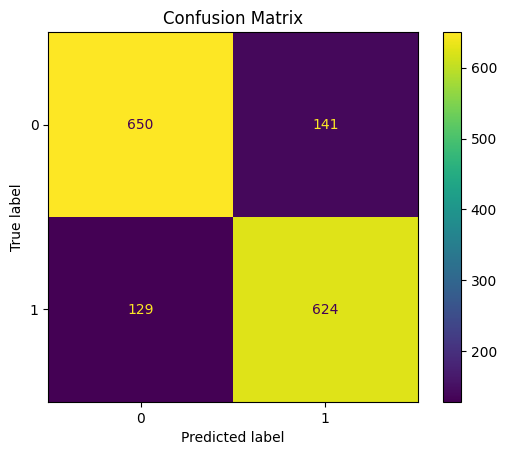

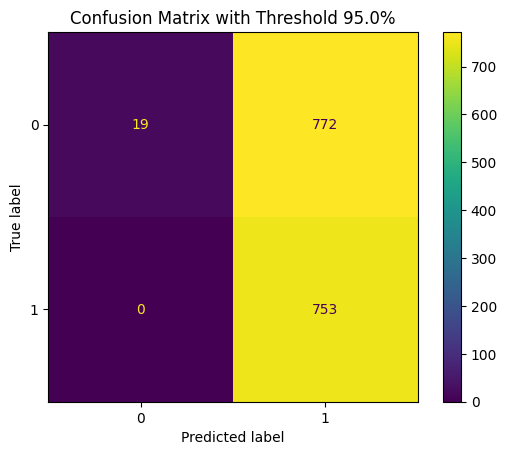

In [ ]:
run_lr_big = LR_training('demo', train_data=train_df, threshold=0.95)

## Switch volume to relative volume
Relative Volume is Volume divided by AVG Volume (3-months)

In [ ]:
# Modify create_train_data to include relative volume instead of volume
def relative_volume(df: pd.DataFrame, window: int) -> pd.DataFrame:
    """
    calculate the relative volume
    """
    out_df = df.copy()

    out_df['Volume'] = out_df['Volume'].astype(float)
    out_df['AVG_Volume'] = out_df['Volume'].rolling(window = window).mean()
    out_df['relative_volume'] = out_df['Volume']/out_df['AVG_Volume']
    return out_df

# TODO make that smaller
def create_train_data(stock_dfs: dict, n: int, volume_type="normal",verbose: bool=False) -> pd.DataFrame:
    """
    create train data for all the stocks given in a dictionary
    """
    #columns of interest
    cols_of_interest = ['Volume', 'normalized_value', '3_reg', '5_reg', '10_reg', '20_reg', 'target']
    if volume_type == "relative":
        cols_of_interest[0] = 'relative_volume'

    main_df = pd.DataFrame(columns = cols_of_interest)

    for stock in stock_dfs.keys():
        df = stock_dfs[stock].copy() # dont want to change the original data
        
        if verbose:
            print(f'Creating train data for {stock}...')

        if volume_type == "relative":
            df = relative_volume(df, 90, inplace=True)

        # add the noramlzied value function and create a new column
        df['normalized_value'] = df.apply(lambda x: normalized_values(x.High, x.Low, x.Close), axis = 1)

        # column with local minima and maxima
        df['loc_min'] = df.iloc[argrelextrema(df.Close.values, np.less_equal, order = n)[0]]['Close']
        df['loc_max'] = df.iloc[argrelextrema(df.Close.values, np.greater_equal, order = n)[0]]['Close']

        # Get the idxs of the local minima and maxima, you dont need all the data for the train set
        # Only the ones with local minima and maxima
        idxs_with_mins = np.where(df['loc_min'] > 0)[0]
        idxs_with_maxs = np.where(df['loc_max'] > 0)[0]

        df = n_day_regression(3, df, list(idxs_with_mins) + list(idxs_with_maxs))
        df = n_day_regression(5, df, list(idxs_with_mins) + list(idxs_with_maxs))
        df = n_day_regression(10, df, list(idxs_with_mins) + list(idxs_with_maxs))
        df = n_day_regression(20, df, list(idxs_with_mins) + list(idxs_with_maxs))

        df = df[(df['loc_min'] > 0) | (df['loc_max'] > 0)]
        df['target'] = [1 if x > 0 else 0 for x in df.loc_max]
        
        df = df[cols_of_interest]
        df = df.dropna(axis = 0, inplace=False)

        main_df = pd.concat([main_df, df], axis = 0)

    print('Train data created...')
    return main_df

In [ ]:
train_df_rel = create_train_data(data_50, 10, volume_type="relative")
train_df_rel

/tmp/ipykernel_3759/2461564582.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  main_df = pd.concat([main_df, df], axis = 0)


Train data created...


,relative_volume,normalized_value,3_reg,5_reg,10_reg,20_reg,target
120,1.704803,0.000000,-1.238009e-02,-0.010873,-0.008358,-0.005767,0
135,0.595399,0.812497,-3.833234e-20,0.001292,0.002277,0.002852,1
141,0.429421,0.125013,-5.384684e-04,-0.001507,-0.001683,0.002107,0
146,1.114311,0.375006,8.611798e-03,0.006028,0.000776,-0.000189,1
162,1.274003,0.812507,4.626065e-03,0.008310,0.004896,0.001601,1
...,...,...,...,...,...,...,...
9807,2.606186,0.050330,-3.190002e+00,-2.761003,-1.370122,0.082880,0
9838,0.428609,0.398926,2.199997e+00,2.481998,0.673212,0.763241,1
9852,1.193182,0.515326,-8.075005e+00,-2.398001,-0.671272,-0.577354,0
9891,0.599963,0.902376,1.949997e+00,1.059000,0.621876,1.035263,1


Created test and train data...
Training model...
Logistic regression model score: 0.8544137022397892
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       780
           1       0.86      0.84      0.85       738

    accuracy                           0.85      1518
   macro avg       0.85      0.85      0.85      1518
weighted avg       0.85      0.85      0.85      1518

              precision    recall  f1-score   support

           0       1.00      0.04      0.07       780
           1       0.50      1.00      0.66       738

    accuracy                           0.50      1518
   macro avg       0.75      0.52      0.37      1518
weighted avg       0.75      0.50      0.36      1518

Model saved... (supposely)


/home/aitha/miniconda3/envs/stock_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


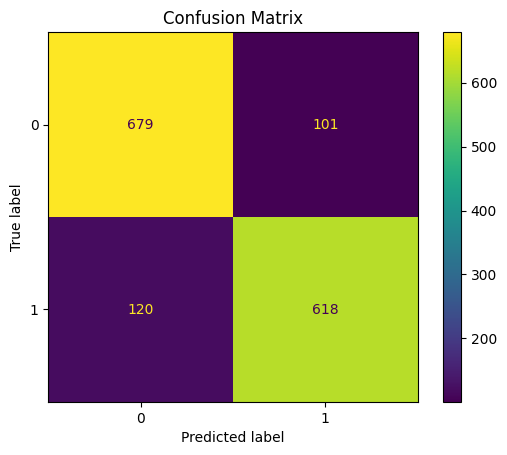

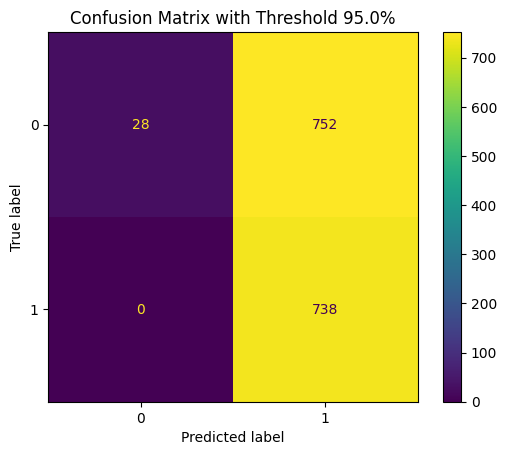

In [ ]:
run_lr_big_rel = LR_training('demo', train_data=train_df_rel, threshold=0.95)

## Test on NVDIA (did not train on it)

In [ ]:
def preprocess_stock(stock: pd.DataFrame, volume_type: str='normal', dropna: bool=False) -> pd.DataFrame:
    """
    preprocess the stock data
    """
    df = stock.copy()

    #columns of interest
    cols_of_interest = ['Volume', 'normalized_value', '3_reg', '5_reg', '10_reg', '20_reg', 'Close']
    if volume_type == "relative":
        cols_of_interest[0] = 'relative_volume'
        df = relative_volume(df, 90, inplace=True)
        
    df['normalized_value'] = df.apply(lambda x: normalized_values(x.High, x.Low, x.Close), axis = 1)

    idxs = df.index.values.tolist()
    df = n_day_regression(3, df, idxs)
    df = n_day_regression(5, df, idxs)
    df = n_day_regression(10, df, idxs)
    df = n_day_regression(20, df, idxs)

    return df[cols_of_interest].dropna(axis = 0) if dropna else df[cols_of_interest]

In [ ]:
nvdia = data.copy()
nvdia_pr = preprocess_stock(nvdia, volume_type='relative', dropna=True)
close = nvdia_pr.pop('Close')
nvdia_pr

,relative_volume,normalized_value,3_reg,5_reg,10_reg,20_reg
89,0.642982,0.999999,0.000060,0.000012,-0.000542,-0.000093
90,1.044840,0.000000,0.000239,0.000036,-0.000448,-0.000097
91,0.348335,0.599080,-0.000537,-0.000143,-0.000267,-0.000145
92,0.677957,0.667513,-0.000179,-0.000084,-0.000077,-0.000168
93,1.087458,0.334183,0.000537,-0.000036,-0.000020,-0.000195
...,...,...,...,...,...,...
6466,0.795874,0.624378,-1.295002,-1.478001,0.265697,0.746970
6467,0.709092,0.962616,2.924999,0.030999,0.312606,0.701843
6468,1.014499,0.486820,3.035000,1.280999,0.287393,0.593602
6469,0.839073,0.854681,2.435001,2.751000,0.324121,0.549598


In [ ]:
model = run_lr_big_rel.lr
scaler = run_lr_big_rel.scaler

pred_df = nvdia_pr.copy() # this is the nvdia data
print(f'{len(pred_df)} samples were fetched from the above..')
x = scaler.fit_transform(pred_df)
print('Created inference data...')

# Predict
predictions = model.predict(x)

#preds with threshold
predictions_proba = model._predict_proba_lr(x)
predictions_proba_thresholded = _threshold(predictions_proba, threshold=0.9999)

6382 samples were fetched from the above..
Created inference data...


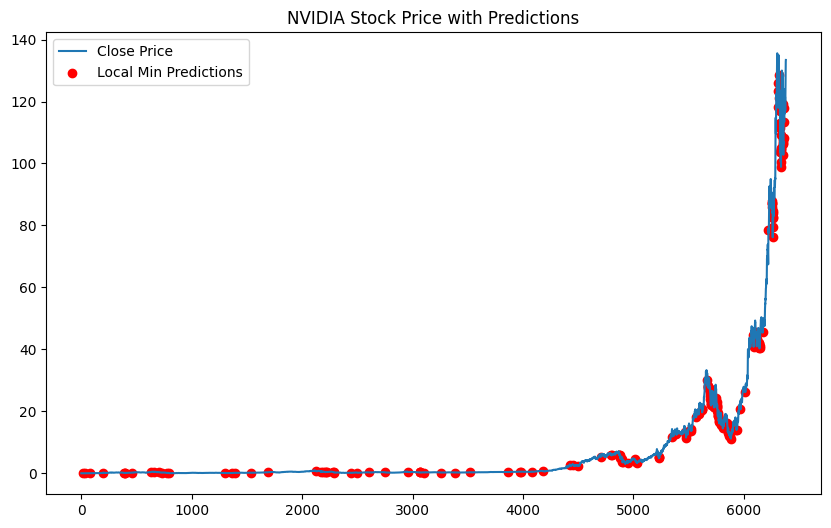

In [ ]:
pred_df['predictions'] = predictions_proba_thresholded
pred_df['close'] = close

# Reset the index to get the 'Date' column
pred_df_reset = pred_df.reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(pred_df_reset.index, pred_df_reset['close'], label='Close Price')

# # Highlight the indices with predictions of 0 in red
plt.scatter(pred_df_reset.index[pred_df_reset['predictions'] == 0],
            pred_df_reset['close'][pred_df_reset['predictions'] == 0],
            color='red', label='Local Min Predictions')

# Add title and legend
plt.title("NVIDIA Stock Price with Predictions")
plt.legend()
plt.show()

In [ ]:
nvdia = data.copy()
nvdia_pr = preprocess_stock(nvdia, volume_type='nomral', dropna=True)
close = nvdia_pr.pop('Close')
nvdia_pr

,Volume,normalized_value,3_reg,5_reg,10_reg,20_reg
21,138096000,0.799868,0.000776,0.000191,0.000520,0.000067
22,612768000,0.183670,0.001074,0.000967,0.000634,0.000190
23,149136000,0.130551,0.002627,0.001576,0.000769,0.000309
24,172608000,0.083209,0.000956,0.001337,0.000677,0.000395
25,92160000,0.531317,-0.001732,0.000549,0.000562,0.000442
...,...,...,...,...,...,...
6466,277118000,0.624378,-1.295002,-1.478001,0.265697,0.746970
6467,243678100,0.962616,2.924999,0.030999,0.312606,0.701843
6468,346250200,0.486820,3.035000,1.280999,0.287393,0.593602
6469,284485800,0.854681,2.435001,2.751000,0.324121,0.549598


In [ ]:
model = run_lr_big.lr
scaler = run_lr_big.scaler

pred_df = nvdia_pr.copy() # this is the nvdia data
print(f'{len(pred_df)} samples were fetched from the above..')
x = scaler.fit_transform(pred_df)
print('Created inference data...')

# Predict
predictions = model.predict(x)

#preds with threshold
predictions_proba = model._predict_proba_lr(x)
predictions_proba_thresholded = _threshold(predictions_proba, threshold=0.9999)

6450 samples were fetched from the above..
Created inference data...


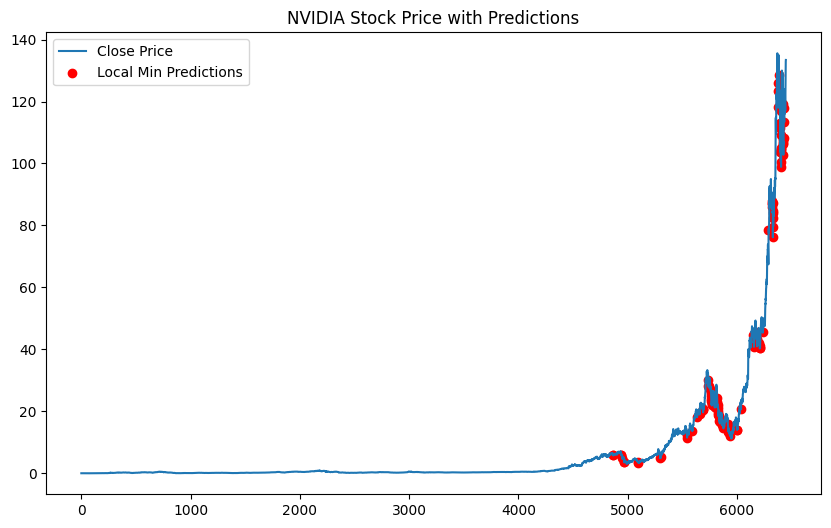

In [ ]:
pred_df['predictions'] = predictions_proba_thresholded
pred_df['close'] = close

# Reset the index to get the 'Date' column
pred_df_reset = pred_df.reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(pred_df_reset.index, pred_df_reset['close'], label='Close Price')

# # Highlight the indices with predictions of 0 in red
plt.scatter(pred_df_reset.index[pred_df_reset['predictions'] == 0],
            pred_df_reset['close'][pred_df_reset['predictions'] == 0],
            color='red', label='Local Min Predictions')

# Add title and legend
plt.title("NVIDIA Stock Price with Predictions")
plt.legend()
plt.show()